<a href="https://colab.research.google.com/github/machinelearningtogo/handling-missing-data-mlt/blob/main/Handling_missing_data_mlt_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gestion de valeurs manquantes dans un projet de machine learning !
### MLT workshop.

Slide: https://docs.google.com/presentation/d/1qBrnvcoSEz1cu1R7jy5ukAfrhkU4JLRecKB67mAJma0/edit#slide=id.gcb9a0b074_1_0

#Objectif:
utilisez l'apprentissage automatique pour créer un modèle qui prédit quels passagers ont survécu au naufrage du Titanic.
Interessant... ⏳

In [4]:
# importer les libraries
import numpy as np
import pandas as pd

In [5]:
# Importer notre dataset
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# Importer notre dataset
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Afficher quelques lignes du train dataset
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Ici il faut remarquer que les colonnes ages et cabin ont des valeurs manquantes.
- Cependant ces colonnes sont differents d'un point de vue type de donnees.
- age (numerique)
- cabin (categorique)

In [8]:
#Les columns contenant les valeurs null sont:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

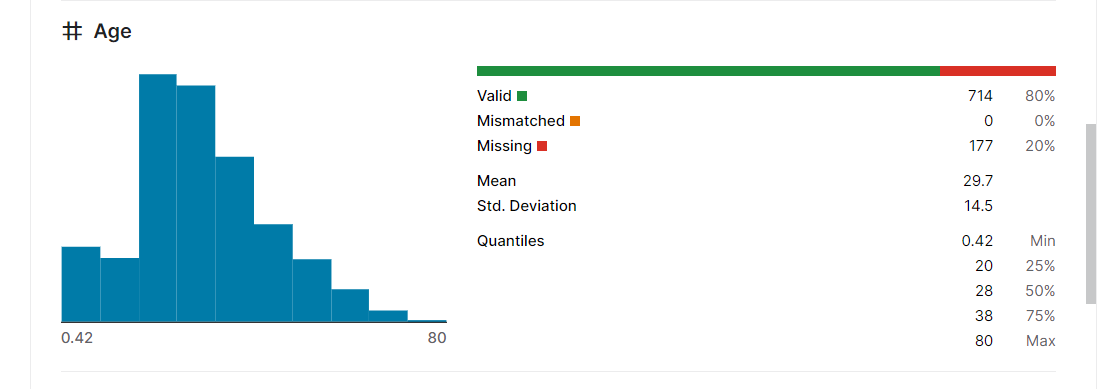

Remarque: 😀
la colonne age possède 177 valeurs null ou données manquantes.
La colonne cabine cabine en possède 697.
- NB: Ici j'utilise seaborne pour avoir des détails visuel sur mon dataset. N'hesitez pas a vous amuser avec les parametres de la fonction heatmap() 😆




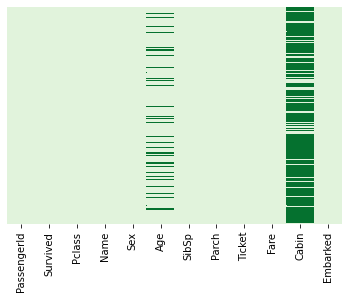

In [9]:
#Voici une représentation visuelle de notre dataset pour mieux voir les valeurs manquantes des colonnes
import seaborn as sns
# creating a colormap
colormap = sns.color_palette("Greens")
sns.heatmap(train.isnull(), yticklabels=False, xticklabels=True, cbar=False, cmap=colormap)

#Gerons les valuers manquantes de la colonne: age
NB:Nous allons utiliser les 3 méthodes vu en présentation slide.

### Suppression des lignes contenant des valeurs manquantes.

In [10]:
# 01 supprimer les colonnes lignes des colonnes manquantes (cf le slides pour avoir les details sur cette methode)
new_training = train.dropna()
new_training.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [11]:
new_training.isna().sum()
#Remarquez que vous pousez utiliser soit isnull() ou isna()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
#Quelle est alors la structure de notre nouvelle training_set
new_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [13]:
train.info()
#Comparez ici les informations sur les  datasets train (du debut) et new_traing de la fin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Comme vous l'avez remarquez cette methodes a reduit nos donnees de 891 entrees a 183 entrees. Ce qui est loin d'etre negligeable en terme de consequence sur notre model.

A retenir: C'est loin d'être idéal, mais pour d'autres ensembles de données, cette approche pourrait être très raisonnable. Je dirais qu'une réduction maximale de 5 % serait acceptable, sinon vous risquez de perdre des données précieuses qui affecteront l'entraînement de votre modèle.

### Utiliser des methodes en statistiques (cf slides)
- Mean
- Median
- most frequent value

In [14]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


001---> Utilisons la methode mean.

In [15]:
#train.fillna(train.mean(), inplace=True)
#train.head(10)

002---> Utilisons la methode mediane.

In [16]:
#train.fillna(train.median(), inplace=True)
#train.head(10)

003---> Utilisons le  "most frequent value".

In [17]:
#train = train.fillna(train['Age'].value_counts().index[0])
#train.head(10)

### Repreons tout ca maintenant avec la librarie Simpleimputer. 🏃

In [18]:
ds  = train.iloc[: , 5].values.reshape(-1, 1)

In [19]:
ds

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [  nan],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [  nan],
       [31.  ],
       [  nan],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [  nan],
       [19.  ],
       [  nan],
       [  nan],
       [40.  ],
       [  nan],
       [  nan],
       [66.  ],
       [28.  ],
       [42.  ],
       [  nan],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [  nan],
       [ 3.  ],
       [19.  ],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [  nan],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [20]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent') ## mean, constant, mediane, most_frequent
imp.fit(ds)
print(imp.transform(ds))
## cette methode tranform est reversible
#imp.inverse_transform(ds)

[[22.  ]
 [38.  ]
 [26.  ]
 [35.  ]
 [35.  ]
 [24.  ]
 [54.  ]
 [ 2.  ]
 [27.  ]
 [14.  ]
 [ 4.  ]
 [58.  ]
 [20.  ]
 [39.  ]
 [14.  ]
 [55.  ]
 [ 2.  ]
 [24.  ]
 [31.  ]
 [24.  ]
 [35.  ]
 [34.  ]
 [15.  ]
 [28.  ]
 [ 8.  ]
 [38.  ]
 [24.  ]
 [19.  ]
 [24.  ]
 [24.  ]
 [40.  ]
 [24.  ]
 [24.  ]
 [66.  ]
 [28.  ]
 [42.  ]
 [24.  ]
 [21.  ]
 [18.  ]
 [14.  ]
 [40.  ]
 [27.  ]
 [24.  ]
 [ 3.  ]
 [19.  ]
 [24.  ]
 [24.  ]
 [24.  ]
 [24.  ]
 [18.  ]
 [ 7.  ]
 [21.  ]
 [49.  ]
 [29.  ]
 [65.  ]
 [24.  ]
 [21.  ]
 [28.5 ]
 [ 5.  ]
 [11.  ]
 [22.  ]
 [38.  ]
 [45.  ]
 [ 4.  ]
 [24.  ]
 [24.  ]
 [29.  ]
 [19.  ]
 [17.  ]
 [26.  ]
 [32.  ]
 [16.  ]
 [21.  ]
 [26.  ]
 [32.  ]
 [25.  ]
 [24.  ]
 [24.  ]
 [ 0.83]
 [30.  ]
 [22.  ]
 [29.  ]
 [24.  ]
 [28.  ]
 [17.  ]
 [33.  ]
 [16.  ]
 [24.  ]
 [23.  ]
 [24.  ]
 [29.  ]
 [20.  ]
 [46.  ]
 [26.  ]
 [59.  ]
 [24.  ]
 [71.  ]
 [23.  ]
 [34.  ]
 [34.  ]
 [28.  ]
 [24.  ]
 [21.  ]
 [33.  ]
 [37.  ]
 [28.  ]
 [21.  ]
 [24.  ]
 [38.  ]
 [24.  ]
 [47.  ]
 

NB: D'autre part, des algorithmes tels que K-Nearest Neighbor, Naive Bayes et XGBoost fonctionnent tous avec des données manquantes. 
A suivre...